In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
force_files = glob.glob('**/*forceCoeffs.dat', recursive=True)

In [46]:
#for file in force_files:
#    print(file)

In [3]:
df = pd.DataFrame()
for f in force_files:
    aoa = int(f.split('/')[0].replace('AoA_',''))
    # Read the header first (line starting with "#")
    with open(f) as fh:
        header = None
        for line in fh:
            if line.startswith("# Time"):
                header = line.lstrip("#").strip().split()
                break
    
    if header is None:
        continue  # skip if no header found

    # Load data into dataframe
    data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
    data['aoa'] = aoa
    df = pd.concat([df, data], axis=0)

/tmp/ipykernel_20940/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_20940/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_20940/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_20940/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=

In [4]:
df2 = df[df.Time==500].sort_values(by='aoa').reset_index(drop=True)

In [5]:
df2

,Time,Cm,Cd,Cl,Cl(f),Cl(r),aoa
0,500,-0.124864,0.038147,-0.263439,-0.256583,-0.006856,-4
1,500,0.064673,0.032037,-0.124986,0.002180,-0.127166,-3
2,500,0.249543,0.033651,0.017104,0.258095,-0.240991,-2
3,500,0.411930,0.030091,0.164587,0.494224,-0.329637,-1
4,500,0.582051,0.036587,0.311772,0.737937,-0.426165,0
5,500,0.715044,0.042728,0.452894,0.941491,-0.488597,1
6,500,0.851696,0.054341,0.598499,1.150945,-0.552446,2
7,500,1.075186,0.083692,0.760139,1.455256,-0.695117,3
8,500,1.131167,0.092974,0.894281,1.578307,-0.684026,4
9,500,1.296247,0.123347,1.046242,1.819368,-0.773126,5


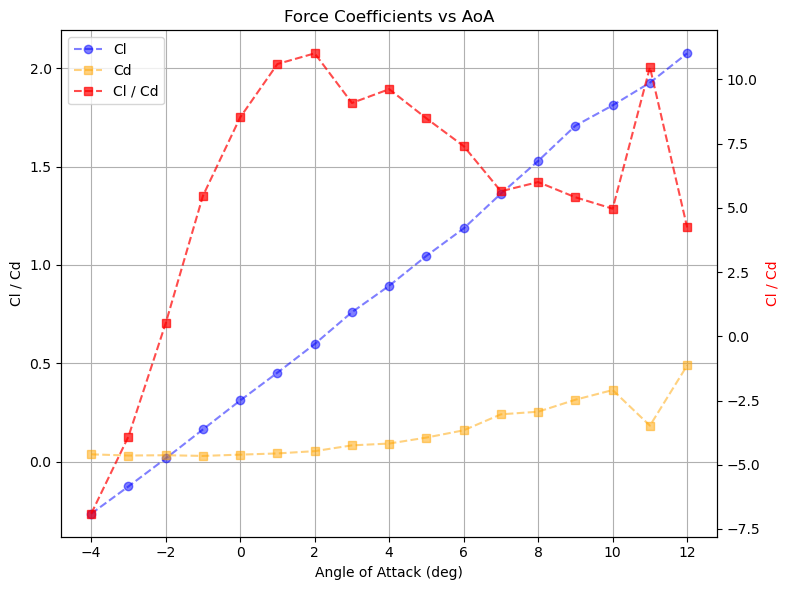

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["aoa"], df2["Cl"], 'o--', color='blue', alpha=0.5, label="Cl")
ax1.plot(df2["aoa"], df2["Cd"], 's--', color='orange', alpha=0.5, label="Cd")
#ax1.plot(df2["aoa"], df2["Cm_last"], '^--', color='green', alpha=0.5, label="Cm (last)")

ax1.set_xlabel("Angle of Attack (deg)")
ax1.set_ylabel("Cl / Cd", color='black')  # main axis label
ax1.grid(True)

# Optional: combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()

# --- Secondary y-axis: Cl/Cd ---
ax2 = ax1.twinx()
ax2.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.7, label="Cl / Cd")
ax2.set_ylabel("Cl / Cd", color='red')

# Combine legends
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

plt.title("Force Coefficients vs AoA")
plt.tight_layout()
plt.show()


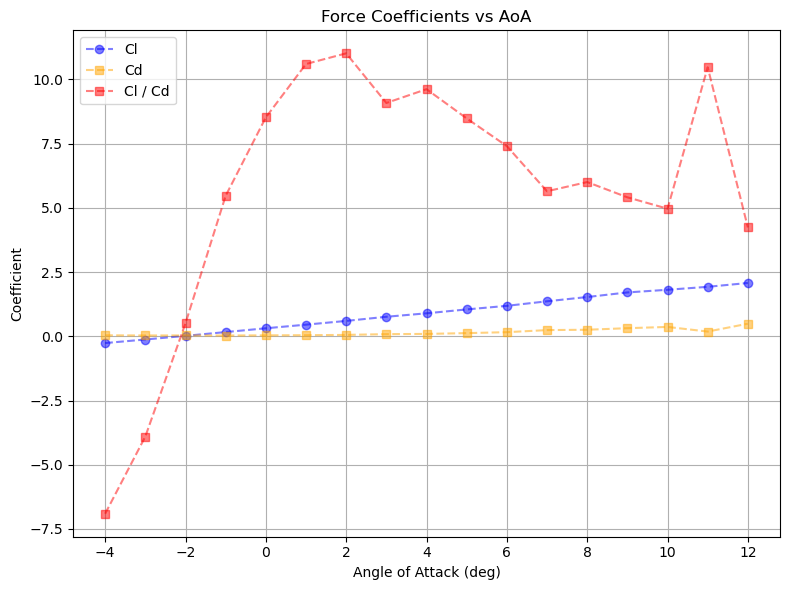

In [6]:
# Plot Cl, Cd, Cm (mean values) vs AoA
plt.figure(figsize=(8,6))
#plt.plot(df["AoA"], df["Cl_mean"], marker='o', label="Cl (mean)")
#plt.plot(df["AoA"], df["Cd_mean"], marker='s', label="Cd (mean)")
#plt.plot(df["AoA"], df["Cm_mean"], marker='^', label="Cm (mean)")

# Optional: also plot last timestep values
plt.plot(df2["aoa"], df2["Cl"], 'o--', color='blue', alpha=0.5, label="Cl")
plt.plot(df2["aoa"], df2["Cd"], 's--', color='orange', alpha=0.5, label="Cd")
#plt.plot(df["aoa"], df["Cm_last"], '^--', color='green', alpha=0.5, label="Cm (last)")
plt.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.5, label="Cl / Cd")

plt.xlabel("Angle of Attack (deg)")
plt.ylabel("Coefficient")
plt.title("Force Coefficients vs AoA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
